# Assignment Dataprocessing  

## (a)

In [168]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# FutureWarnings
pd.set_option('future.no_silent_downcasting', True)

path = os.path.join(os.getcwd(), "../Data/College.csv")
college = pd.read_csv(path)

## (b)

In [169]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [170]:
college2 = pd.read_csv(path, index_col =0)
college3 = college.rename({"Unnamed: 0": "College"}, axis =1)
college3 = college3.set_index("College")
college = college3

## (c)

In [171]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## (d)

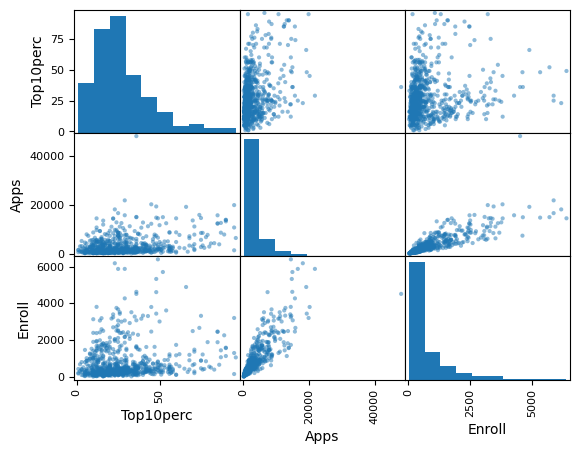

In [172]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])
plt.show()

## (e)

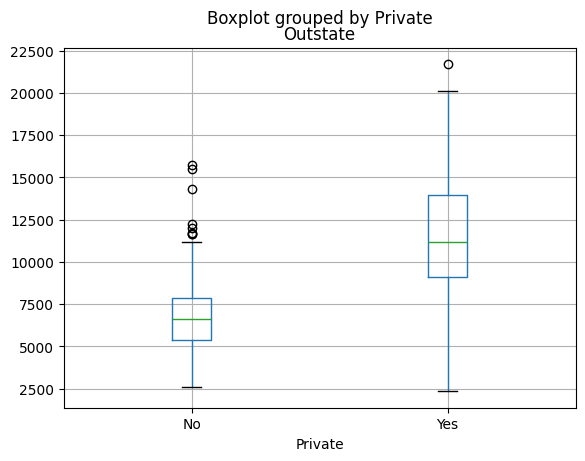

In [173]:
college.boxplot(column = "Outstate", by = "Private")
plt.show()

## (f)

Elite
No     699
Yes     78
Name: count, dtype: int64


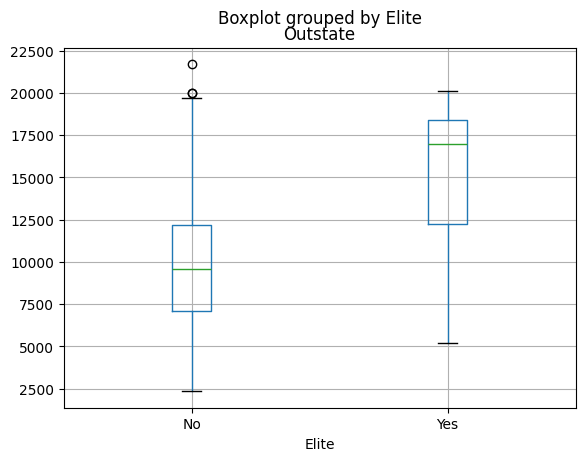

In [174]:
college["Elite"] = pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])
print(college["Elite"].value_counts())
college.boxplot(column = "Outstate", by = "Elite")
plt.show()

## (g)

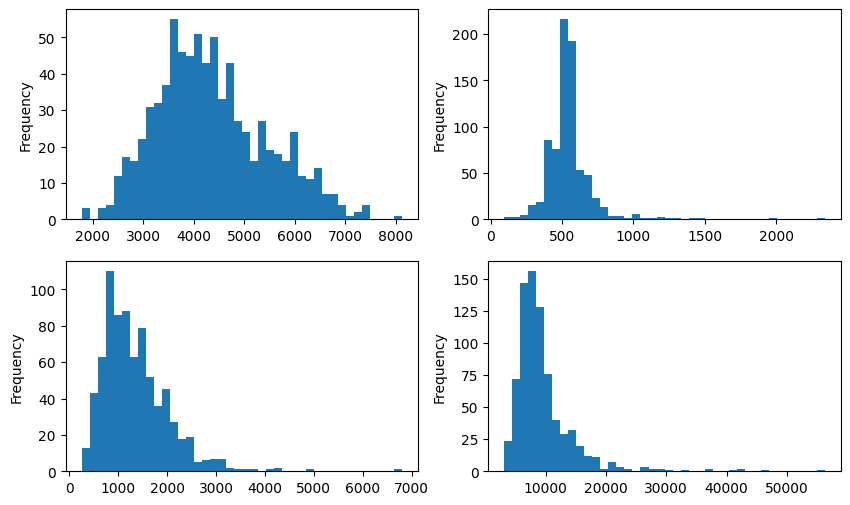

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
college["Room.Board"].plot.hist(ax=axes[0, 0], bins=40)
college["Books"].plot.hist(ax=axes[0, 1], bins=40)
college["Personal"].plot.hist(ax=axes[1, 0], bins=40)
college["Expend"].plot.hist(ax=axes[1, 1], bins=40)
plt.show()

## (h)

### Correlation visualisation

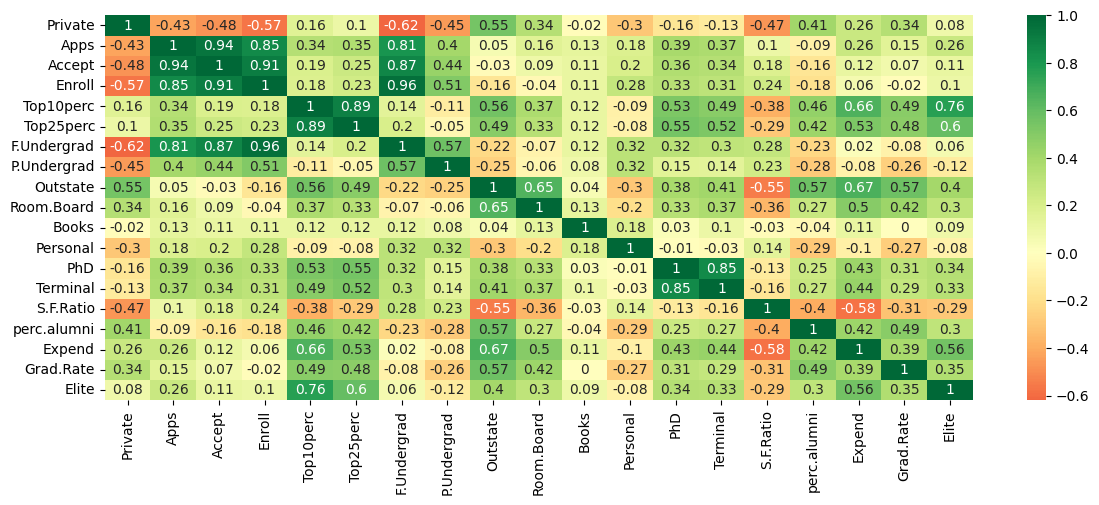

In [176]:
data = college.copy()
data["Private"] = data["Private"].apply(lambda x: 1 if x == "Yes" else 0)
data["Elite"] = data["Elite"].apply(lambda x: 1 if x == "Yes" else 0)
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr().round(2), annot=True, cmap='RdYlGn', center=0)
plt.show()

In the above matrix we simply use the whole dataframe to get a sense of possible correlations. To begin with, correlations are not the only matter of interest but it can provide an indication on where to start. The values represented here show mainly weak correlations overall. However there are a larger quantity of positive correlations, even in the edges of the spectrum.  

What should we begin to focus on? The very strong positive cluster in the top-left corner can mainly be ignored. For example, the higher number of accepted applicants you should also see a higher number of enrolled students, at least that's my assumption which seems to be verified here. The same can be said for the correlation of full-time and part-time undergraduates in regards to applicants, accepted and enrolled students. It goes without saying that the higher the number of students at universities the higher the number of either full-time or part-time undergraduates.  

We can see that the top students have a somewhat high positive correlation with both elite status and instructional expenditure. Let's begin looking at that and costs in general.  

### Costs for students

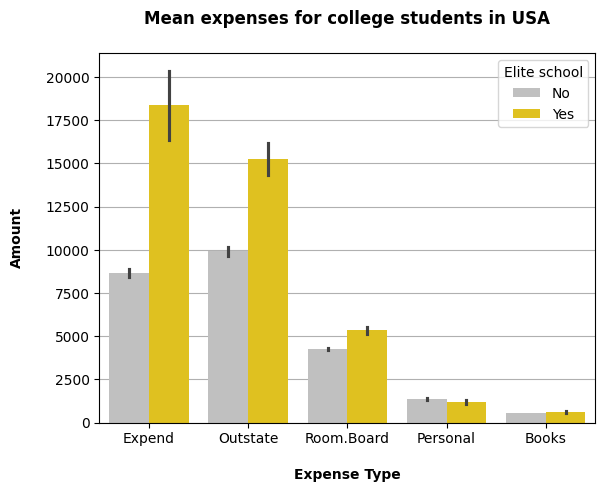

In [177]:
filt = college[["Elite", "Expend", "Outstate", "Room.Board", "Personal", "Books"]]
filt = filt.melt(id_vars="Elite", var_name="Expense.Type", value_name="Amount", ignore_index=False)
pal = {"No": "silver", "Yes": "gold"}
sns.barplot(data=filt, x="Expense.Type", y="Amount", hue="Elite", palette=pal, zorder=2)
plt.title("Mean expenses for college students in USA\n", fontweight="bold")
plt.ylabel("Amount\n", fontweight="bold")
plt.xlabel("\nExpense Type", fontweight="bold")
plt.legend(title="Elite school")
plt.grid(axis="y", zorder=1)
plt.show()

From the analysis above we can tell that the most differentiating factor when it comes to the costs associated with college depends on the college itself. Elite universities that have a higher attendance of students that were top of their classes in high school will demand more, economically, of each student. We do not have a list of what expenses are totalled in this column but we can assume to some extent that it could include tuition and other fees. Especially since the out-of-state tuition seems to be following the same trend.    

All other categories show, in relation, statistically miniscule differences between top colleges and others, especially expenses for daily living and academic materials. 

With that said, where do these colleges put this money? Will it go directly/indirectly towards the students education or not? Let's look at that.  

### Success and prestige

In [178]:
# Grad.Rate
# perc.alumni
# S.F.Ratio
# Terminal
# PhD

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,No


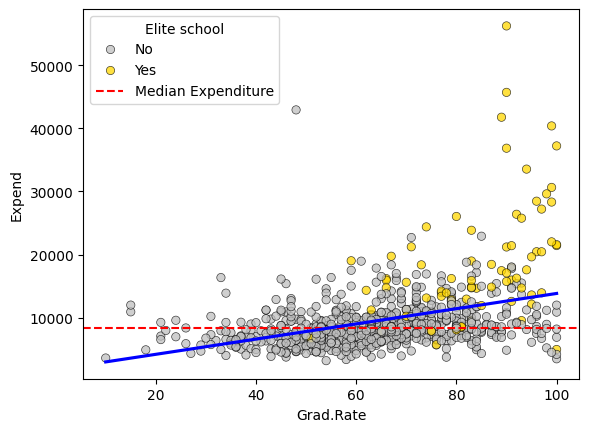

In [205]:
# Cazenovia College	has a graduation rate of 118 % and will be removed
outliers = college[college["Grad.Rate"] > 100]
display(outliers)
data = college.copy()
data = data.drop(data[data["Grad.Rate"] > 100].index)

# sns.lineplot(data=data, x="Grad.Rate", y="Expend", hue="Elite")
ax = sns.scatterplot(data=data, x="Grad.Rate", y="Expend", hue="Elite", palette=pal, edgecolor="black", alpha=0.75)
ax.axhline(data["Expend"].median(), color="red", linestyle="--", label="Median Expenditure")
sns.regplot(data=data, x="Grad.Rate", y="Expend", scatter=False, color="blue", ci=None)
plt.legend(title="Elite school")
plt.show()

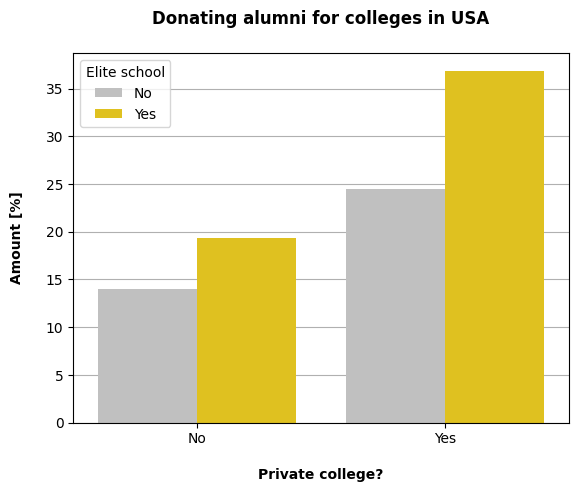

In [180]:
# Donation trend

alumni_donations = college.groupby(['Private', 'Elite'], observed=True)['perc.alumni'].mean()
alumni_donations = alumni_donations.reset_index()
sns.barplot(data=alumni_donations, x="Private", y="perc.alumni", hue="Elite", palette=pal, zorder=2)
plt.title("Donating alumni for colleges in USA\n", fontweight="bold")
plt.ylabel("Amount [%]\n", fontweight="bold")
plt.xlabel("\nPrivate college?", fontweight="bold")
plt.legend(title="Elite school")
plt.grid(axis="y", zorder=1)
plt.show()

# Miscellaneous

In [181]:
expend_grad_rate_corr = college[['Expend', 'Grad.Rate']].corr()
expend_by_status = college.groupby(['Private', 'Elite'], observed=True)['Expend'].mean()
display(expend_grad_rate_corr)
display(expend_by_status)

,Expend,Grad.Rate
Expend,1.000000,0.390343
Grad.Rate,0.390343,1.000000


Private  Elite
No       No        7205.432161
         Yes      11329.384615
Yes      No        9272.984000
         Yes      19819.969231
Name: Expend, dtype: float64

In [182]:
cost_distribution = college[['Outstate', 'Room.Board', 'Personal']].describe()
cost_distribution

,Outstate,Room.Board,Personal
count,777.000000,777.000000,777.000000
mean,10440.669241,4357.526384,1340.642214
std,4023.016484,1096.696416,677.071454
min,2340.000000,1780.000000,250.000000
25%,7320.000000,3597.000000,850.000000
50%,9990.000000,4200.000000,1200.000000
75%,12925.000000,5050.000000,1700.000000
max,21700.000000,8124.000000,6800.000000


<Axes: xlabel='Personal', ylabel='Expend'>

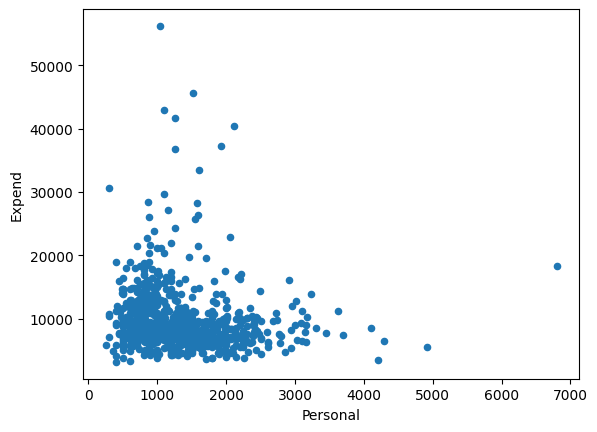

In [183]:
college.plot.scatter(x="Personal", y="Expend")

<Axes: xlabel='perc.alumni', ylabel='Grad.Rate'>

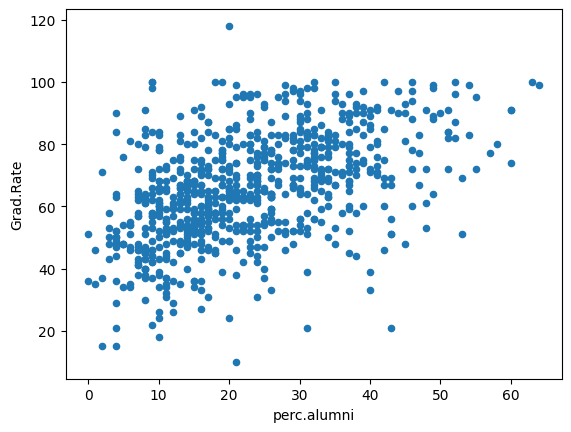

In [184]:
college.plot.scatter(x="perc.alumni", y="Grad.Rate")